In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

alpha, sigma = 1, 1
beta = [1, 2.5]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

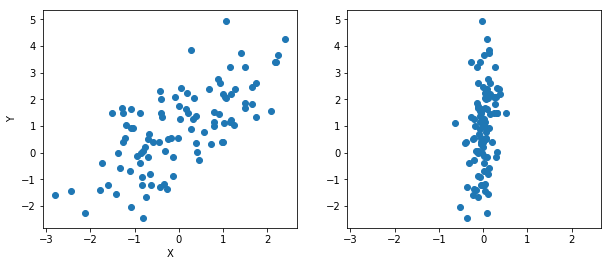

In [3]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y');
axes[0].set_xlabel('X');

In [5]:
from pymc3 import Model, Normal, HalfNormal

In [6]:
basic_model = Model()

with basic_model:
    
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [7]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
{'alpha': array(0.9065985497559482), 'beta': array([ 0.94848602,  2.60705514]), 'sigma_log_': array(-0.03278147017403069)}


In [8]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.019762
         Iterations: 4
         Function evaluations: 176
{'alpha': array(0.9090521898977764), 'beta': array([ 0.95140146,  2.61437458]), 'sigma_log_': array(-0.030009775203258385)}
